In [61]:
from keras.datasets import mnist

In [62]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [63]:
print(f'x_train.shape: {x_train.shape}')
print(f'x_test.shape: {x_test.shape}')
print(f'y_train.shape: {y_train.shape}')
print(f'y_test.shape: {y_test.shape}')

x_train.shape: (60000, 28, 28)
x_test.shape: (10000, 28, 28)
y_train.shape: (60000,)
y_test.shape: (10000,)


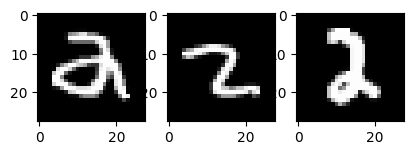

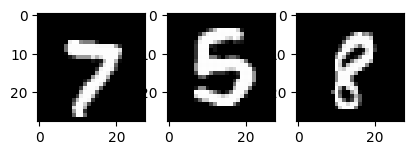

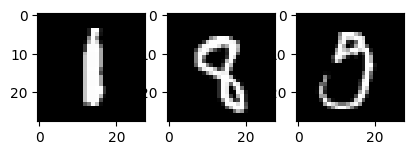

In [64]:
import matplotlib.pyplot as plt
import random

for i in range(1, 4, 1):
    for j in range(1, 4, 1):
        plt.subplot(i, 4, j)
        plt.imshow(x_train[random.randint(0,60000)], cmap="gray")
    plt.show()

In [65]:
x_train_vec = x_train.reshape((60000, 28, 28, 1))
x_test_vec = x_test.reshape((10000, 28, 28, 1))

print(f'x_train.shape: {x_train.shape}')
print(f'x_test.shape: {x_test.shape}')

print(f'x_train_vec.shape: {x_train_vec.shape}')
print(f'x_test_vec.shape: {x_test_vec.shape}')

x_train.shape: (60000, 28, 28)
x_test.shape: (10000, 28, 28)
x_train_vec.shape: (60000, 28, 28, 1)
x_test_vec.shape: (10000, 28, 28, 1)


In [66]:
# One-hot Encoding
# 0 => [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
# 1 => [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
# 2 => [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
# 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]

import numpy as np

def to_one_hot(labels, dimension=10):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

y_train_vec = to_one_hot(y_train)
y_test_vec = to_one_hot(y_test)

print(f"y_train_vec.shape:{y_train_vec.shape}")


y_train_vec.shape:(60000, 10)


In [67]:
print(y_train[50000])
print(y_train_vec[50000])

3
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [68]:
for x in x_train[50000]:
    for i in x:
        print('{:3} '.format(i), end='')
    print()

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0  47 160 195 205  71  86  13   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0  12 238 254 254 254 254 254 227  84   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0  13 196 176 127 176 207 236 245 222  23   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  20 137 254  95   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  78 254 144   0   0   0   0   0 

In [69]:
rand_indices = np.random.permutation(60000)
train_indices = rand_indices[0:50000]
valid_indices = rand_indices[50000:60000]

x_valid_vec = x_train_vec[valid_indices, :, :, :]
y_valid_vec = y_train_vec[valid_indices, :]

x_train_vec = x_train_vec[train_indices, :, :, :]
y_train_vec = y_train_vec[train_indices, :] 

In [71]:
x_train_vec.shape

(50000, 28, 28, 1)

In [93]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(filters=10, kernel_size=(5, 5), activation='relu', 
                 input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=20, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)              │ (None, 24, 24, 10)     │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 12, 12, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 8, 8, 20)       │         5,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 4, 4, 20)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 320)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        32,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,390 (149.96 KB)

 Trainable params: 38,390 (149.96 KB)

 Non-trainable params: 0 (0.00 B)

In [98]:
from keras.optimizers import RMSprop

model.compile(
    optimizer=RMSprop(learning_rate=0.0001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy'])

In [110]:
history = model.fit(x_train_vec, y_train_vec,
          batch_size=128,
          epochs=100,
          validation_data=(x_valid_vec, 
                           y_valid_vec)
         )
          

Epoch 1/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9999 - loss: 4.5204e-04 - val_accuracy: 0.9823 - val_loss: 0.1496
Epoch 2/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9999 - loss: 4.6147e-04 - val_accuracy: 0.9820 - val_loss: 0.1466
Epoch 3/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9999 - loss: 5.1390e-04 - val_accuracy: 0.9830 - val_loss: 0.1473
Epoch 4/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9999 - loss: 3.4879e-04 - val_accuracy: 0.9819 - val_loss: 0.1518
Epoch 5/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 1.0000 - loss: 2.9856e-04 - val_accuracy: 0.9817 - val_loss: 0.1647
Epoch 6/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9999 - loss: 5.4538e-04 - val_accuracy: 0.9822 - val_loss: 0.1553
Epoch 7/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9999 - loss: 2.8300e-04 - val_accuracy: 0.9825 - val_loss: 0.1552
Epoch 8/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 1.00

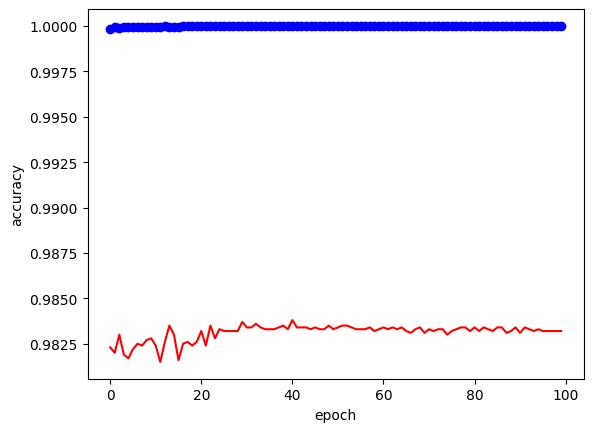

In [111]:
import matplotlib.pyplot as plt
import numpy as np

epoch = np.arange(len(history.history['accuracy']))
train_acc = history.history['accuracy']
valid_acc = history.history['val_accuracy']

plt.plot(epoch, train_acc, 'bo', label='train acc')
plt.plot(epoch, valid_acc, 'red', label='val acc')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [114]:
r = model.evaluate(x_test_vec, y_test_vec)

print('Loss =', str(r[0]))
print('Accuracy =', str(r[1]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9803 - loss: 0.1732
Loss = 0.13457091152668
Accuracy = 0.9847000241279602


In [115]:
model.save('mnist984.h5')

In [116]:
model.save('mnist984.keras')